<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Promotion_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HR Analytics

HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

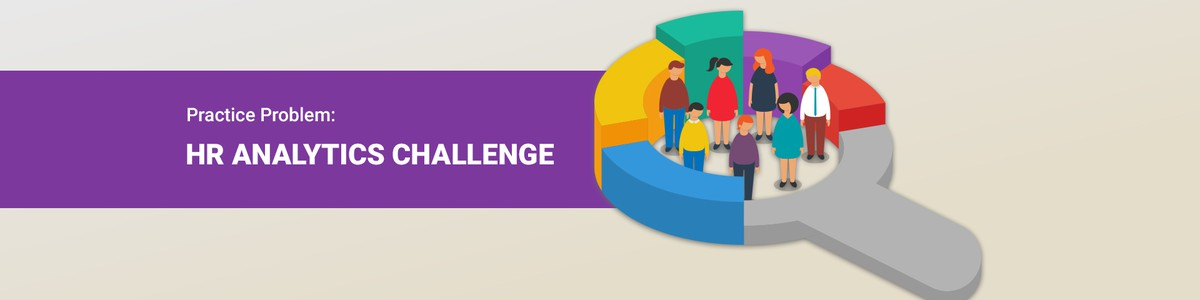

##Objective : identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

## Dataset Description

* employee_id	Unique ID for employee
* department	Department of employee
* region	Region of employment (unordered)
* education	Education Level
* gender	Gender of Employee
* recruitment_channel	Channel of recruitment for employee
* no_of_trainings	no of other trainings completed in previous year on soft skills, technical skills etc.
* age	Age of Employee
* previous_year_rating	Employee Rating for the previous year
* length_of_service	Length of service in years
* KPIs_met >80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
* awards_won?	if awards won during previous year then 1 else 0
* avg_training_score	Average score in current training evaluations
* **is_promoted	(Target)** Recommended for promotion

##Evaluation Metrics
The evaluation metric for this competition is F1 Score.

In [ ]:
!pip install scikit-learn --upgrade


     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from google.colab import files
files.upload()

{}

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!mkdir "/content/drive/MyDrive/AV_Hack/Hr_Analytic"

In [ ]:
import shutil
shutil.move("/content/train_LZdllcl.csv","/content/drive/MyDrive/AV_Hack/Hr_Analytic")
shutil.move("/content/test_2umaH9m.csv","/content/drive/MyDrive/AV_Hack/Hr_Analytic")
shutil.move("//content/sample_submission_M0L0uXE.csv","/content/drive/MyDrive/AV_Hack/Hr_Analytic")

'/content/drive/MyDrive/AV_Hack/Hr_Analytic/sample_submission_M0L0uXE.csv'

## Import Data Science Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv("/content/drive/MyDrive/AV_Hack/Hr_Analytic/train_LZdllcl.csv")
test = pd.read_csv("/content/drive/MyDrive/AV_Hack/Hr_Analytic/test_2umaH9m.csv")
sub = pd.read_csv("/content/drive/MyDrive/AV_Hack/Hr_Analytic/sample_submission_M0L0uXE.csv")

In [39]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [40]:
train.iloc[50]

employee_id                  24104
department                 Finance
region                    region_2
education               Bachelor's
gender                           m
recruitment_channel       sourcing
no_of_trainings                  1
age                             20
previous_year_rating             4
length_of_service                2
KPIs_met >80%                    1
awards_won?                      0
avg_training_score              60
is_promoted                      0
Name: 50, dtype: object

In [41]:
train.iloc[90]

employee_id                         62658
department              Sales & Marketing
region                           region_2
education                             NaN
gender                                  f
recruitment_channel              sourcing
no_of_trainings                         1
age                                    20
previous_year_rating                  NaN
length_of_service                       1
KPIs_met >80%                           0
awards_won?                             0
avg_training_score                     55
is_promoted                             0
Name: 90, dtype: object

## Data Statistics

In [ ]:
train.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


## Visualize Target 

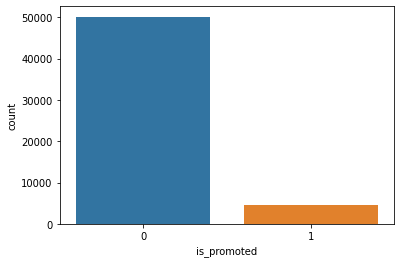

In [ ]:
sns.countplot(x='is_promoted',data=train)

* #### Data is imbalanced 

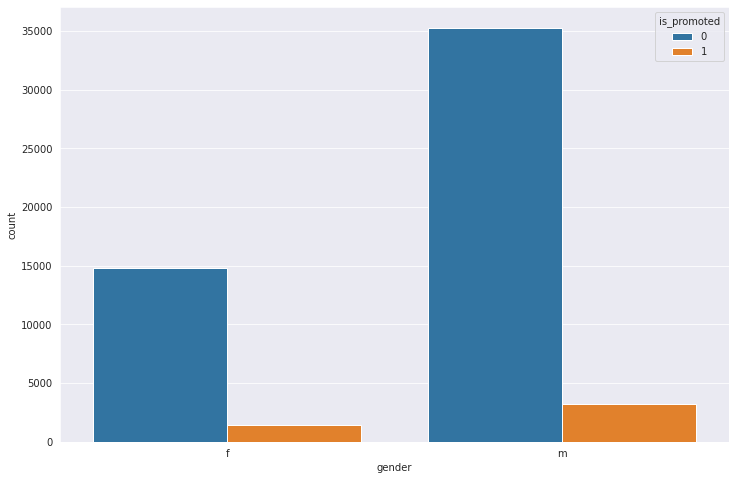

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(x='gender',data=train,hue='is_promoted')

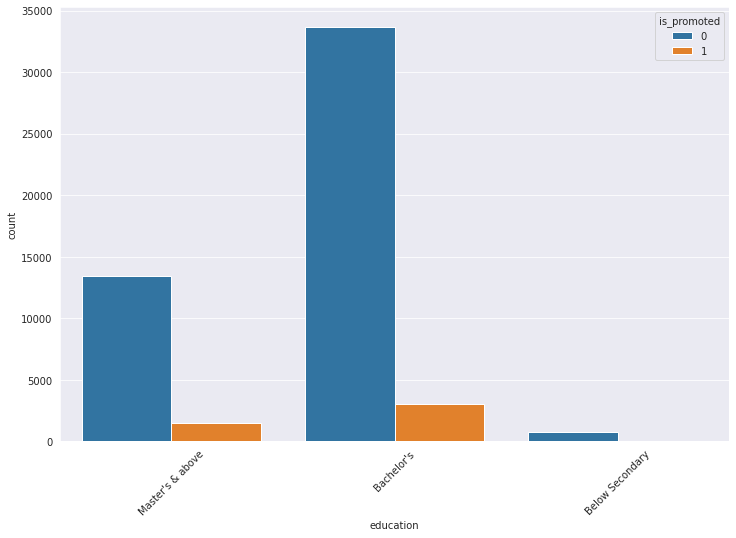

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =45)
sns.countplot(x='education',data=train,hue='is_promoted')

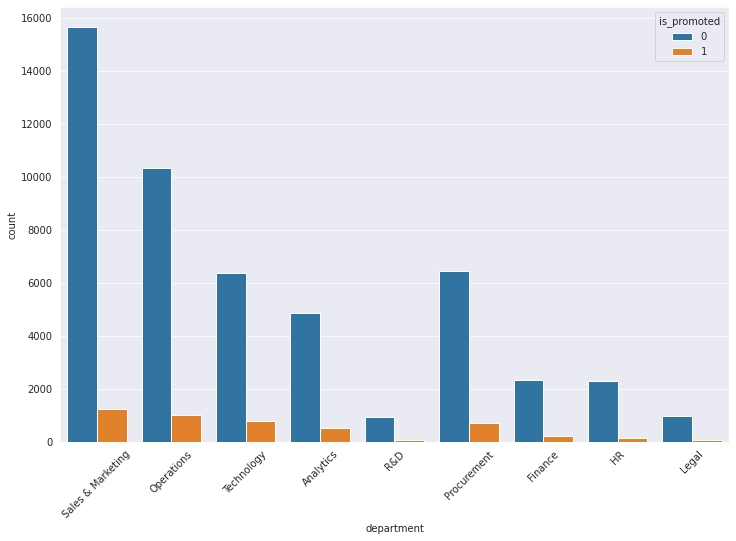

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =45)
sns.countplot(x='department',data=train,hue='is_promoted')

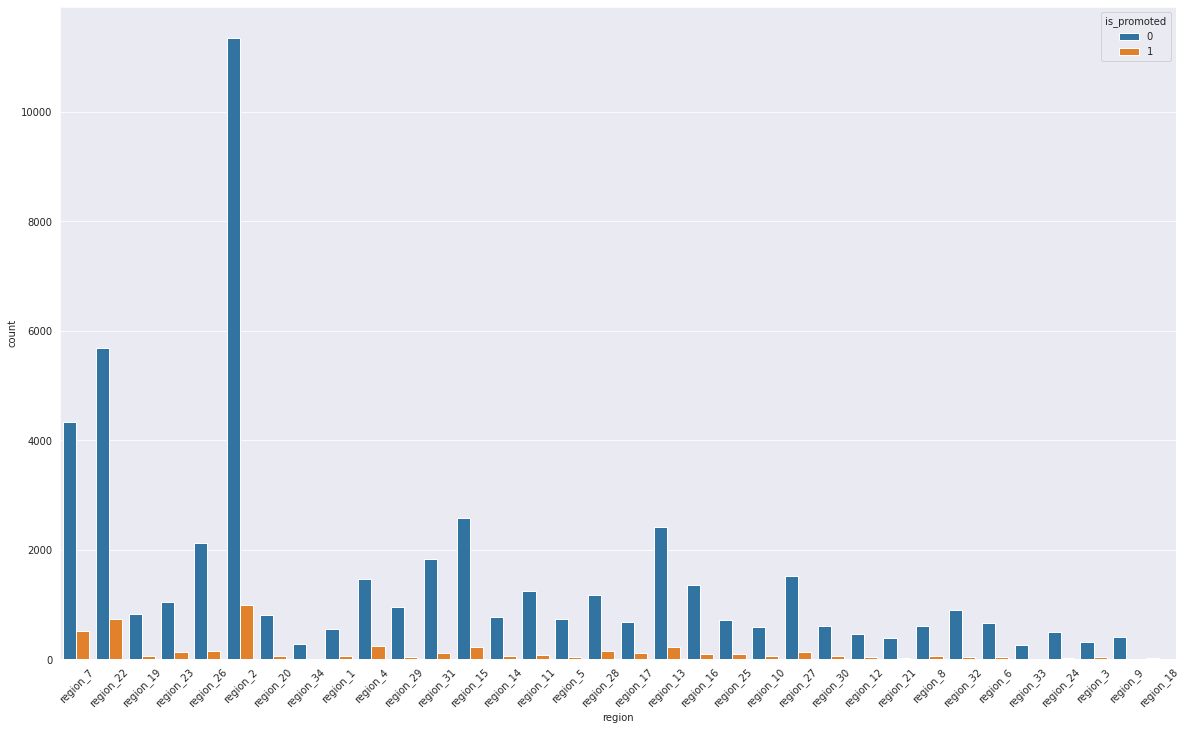

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,12))
plt.xticks(rotation =45)
sns.countplot(x='region',data=train,hue='is_promoted')

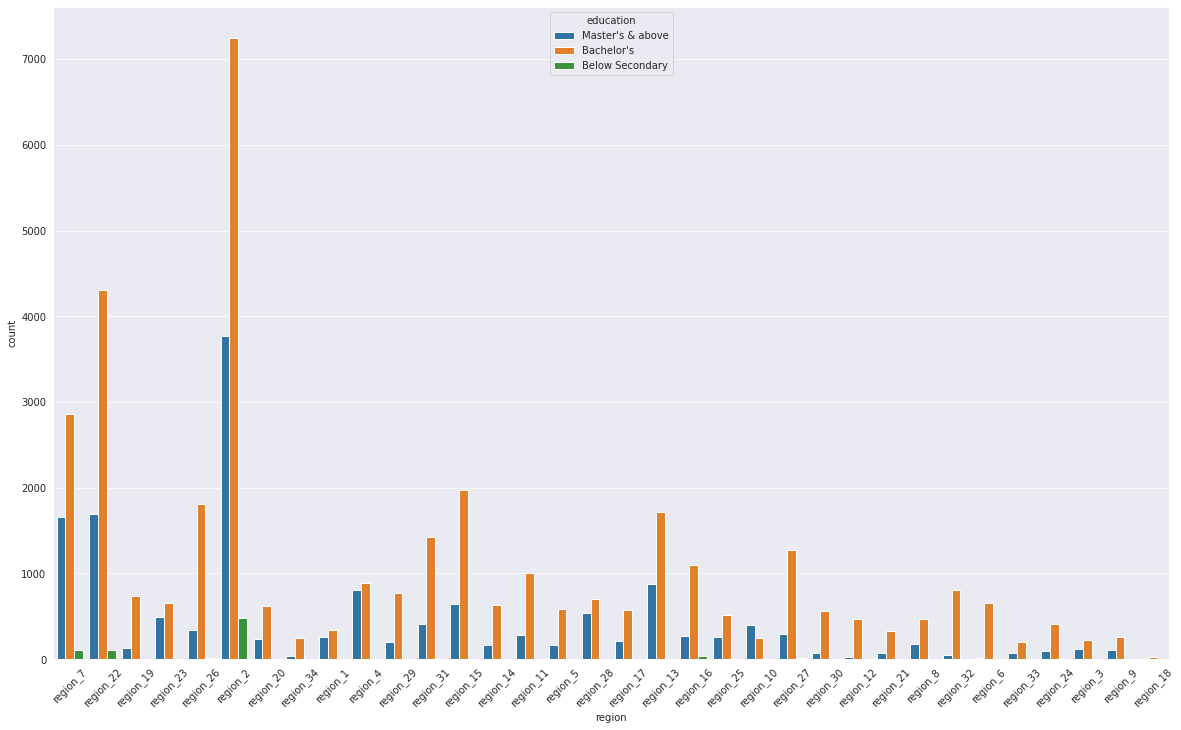

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,12))
plt.xticks(rotation =45)
sns.countplot(x='region',data=train,hue='education')

Dropping employee_id	 column as it is not required

In [ ]:
train.isnull().sum()[train.isnull().sum() > 0] / len(train)

education               0.043953
previous_year_rating    0.075244
dtype: float64

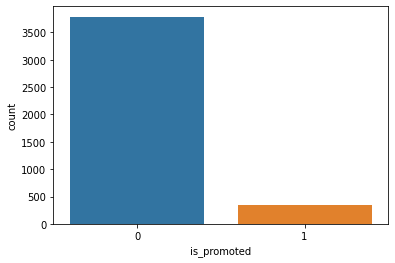

In [ ]:
sns.countplot(x = 'is_promoted',data=train[train['previous_year_rating'].isna()])

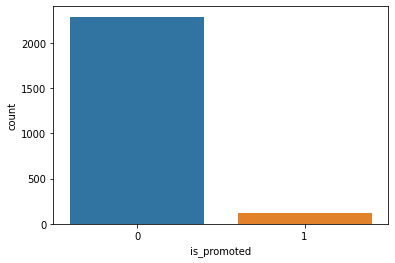

In [ ]:
sns.countplot(x = 'is_promoted',data=train[train['education'].isna()])

In [23]:
train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [5]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(0.0)

In [6]:
train['education'] = train['education'].fillna('Missing')

In [26]:
train.education.value_counts(normalize=True)

Bachelor's          0.669045
Master's & above    0.272314
Missing             0.043953
Below Secondary     0.014688
Name: education, dtype: float64

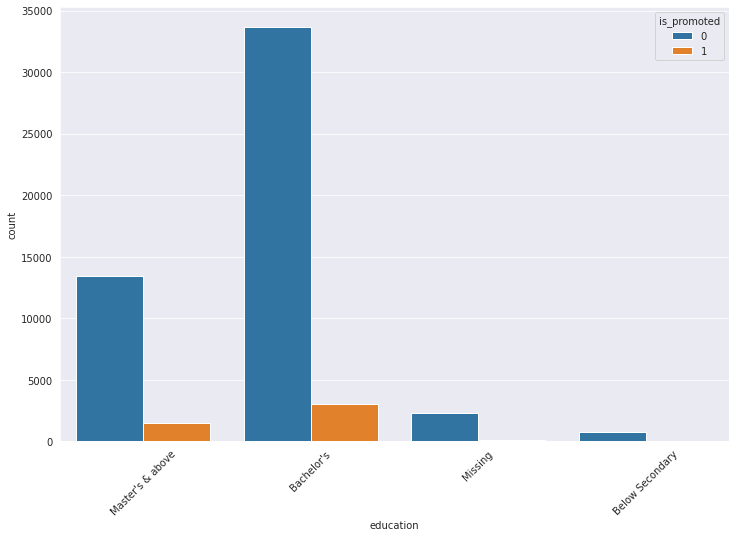

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =45)
sns.countplot(x='education',data=train,hue='is_promoted')

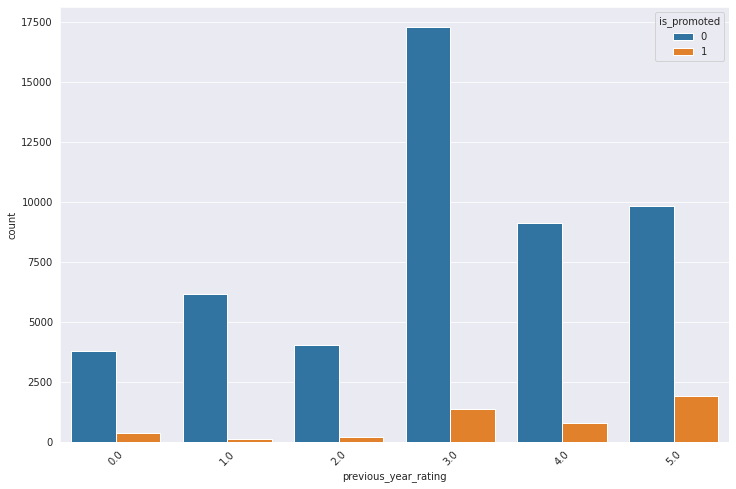

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =45)
sns.countplot(x='previous_year_rating',data=train,hue='is_promoted')

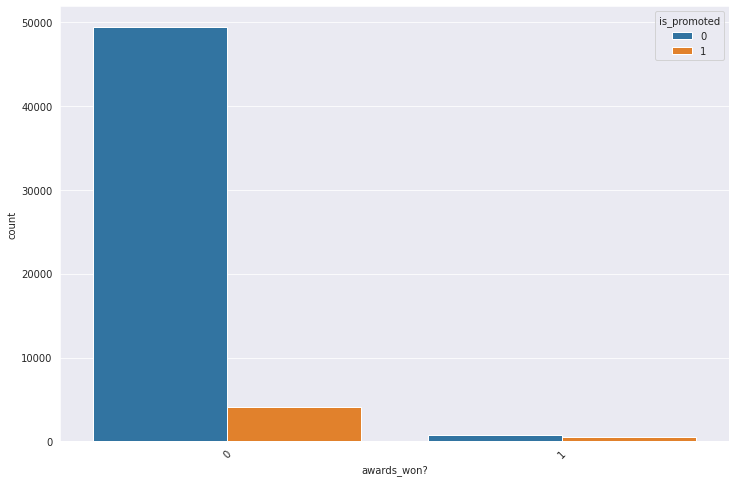

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =45)
sns.countplot(x='awards_won?',data=train,hue='is_promoted')

In [7]:
train = train.drop('employee_id',axis=1)

In [29]:
train.age.max(),train.age.min()

(60, 20)

In [44]:
 pd.cut( x=train['age'], bins=[19, 30, 40, 50,60], labels=['20', '30', '40','50'] )

0        30
1        20
2        30
3        30
4        40
         ..
54803    40
54804    30
54805    20
54806    20
54807    20
Name: age, Length: 54808, dtype: category
Categories (4, object): ['20' < '30' < '40' < '50']

In [8]:
 train['age'] = pd.cut( x=train['age'], bins=[19, 30, 40, 50,60], labels=['20', '30', '40','50'] )

In [9]:
 test['age'] = pd.cut( x=test['age'], bins=[19, 30, 40, 50,60], labels=['20', '30', '40','50'] )

In [51]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [54]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [53]:
test.isnull().sum()[test.isnull().sum() > 0]

education               1034
previous_year_rating    1812
dtype: int64

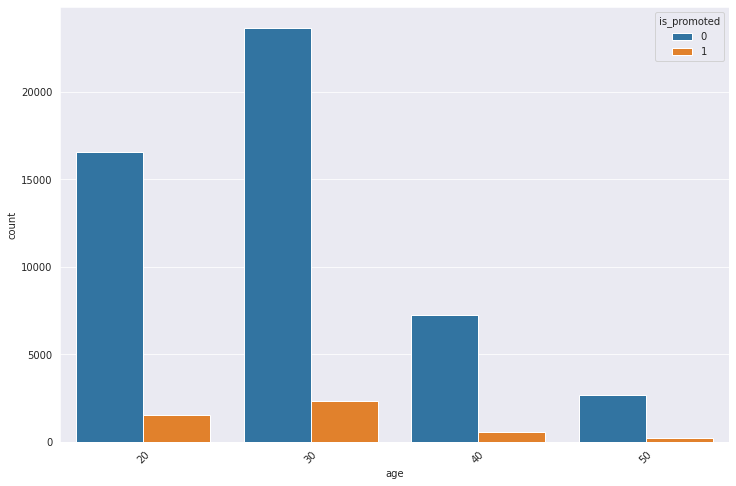

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =45)
sns.countplot(x='age',data=train,hue='is_promoted')

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  object  
 2   region                54808 non-null  object  
 3   education             54808 non-null  object  
 4   gender                54808 non-null  object  
 5   recruitment_channel   54808 non-null  object  
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  category
 8   previous_year_rating  54808 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  KPIs_met >80%         54808 non-null  int64   
 11  awards_won?           54808 non-null  int64   
 12  avg_training_score    54808 non-null  int64   
 13  is_promoted           54808 non-null  int64   
dtypes: category(1), float64(1), int64(7), object(5)
memory

In [63]:
train['age'] = train['age'].astype('str')

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  object 
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 5.4+ MB


In [57]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [10]:
train = train[['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']]

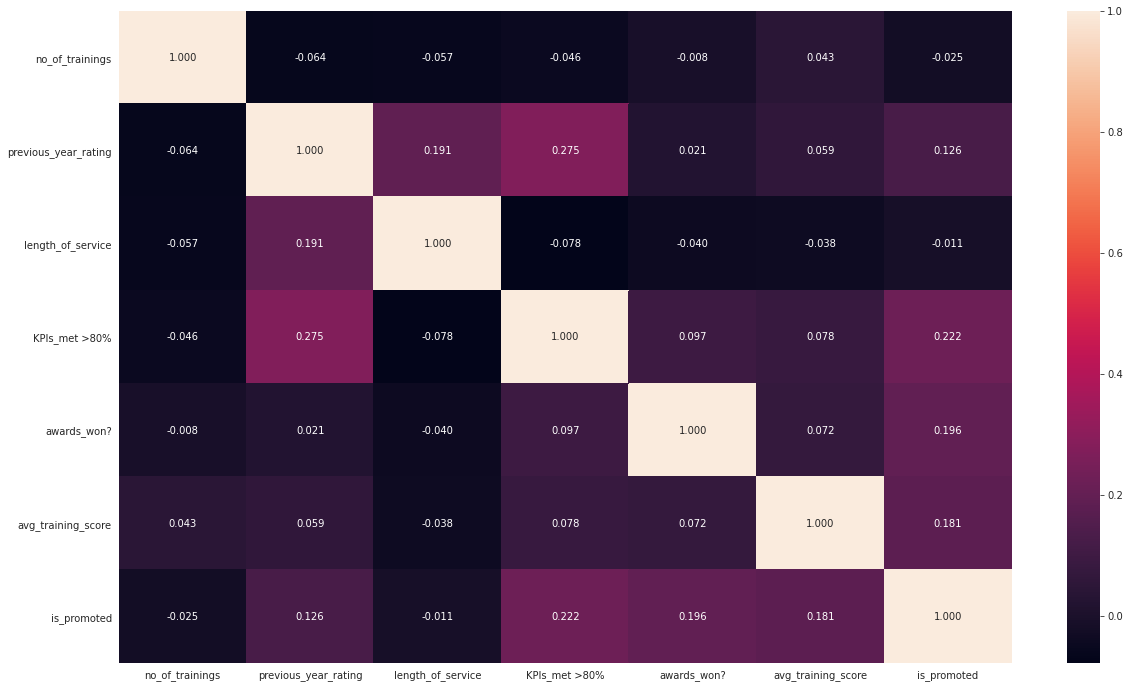

In [59]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True,fmt=".3f")

* length of service does not make an impact on the promotion and the same applies to number of trainings

## Categorical Features

In [11]:
cat_cols = [col for col in train.columns if train[col].dtypes =='O']
num_cols = [col for col in train.columns if col not in cat_cols]

In [61]:
cat_cols

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

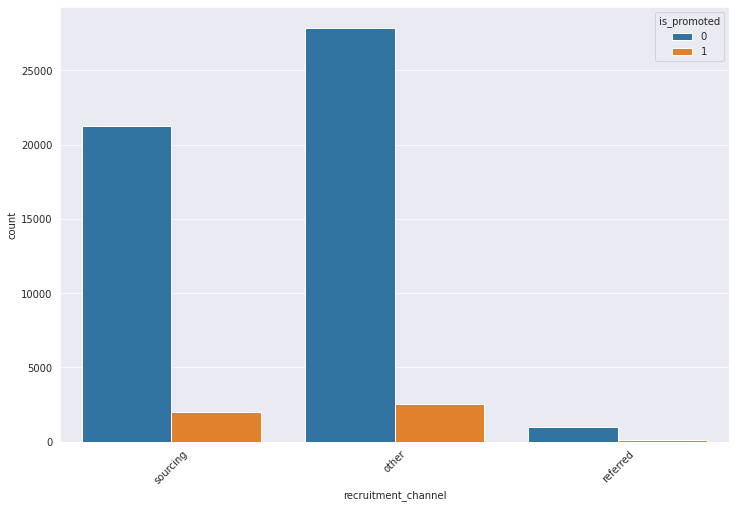

In [66]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =45)
sns.countplot(x='recruitment_channel',data=train,hue='is_promoted')

In [67]:
num_cols

['no_of_trainings',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

## Install Catboost


In [68]:
!pip install catboost

     |████████████████████████████████| 67.3MB 79kB/s 


In [12]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=fc070ad23616d045dc3f61e466fd1929a0ffe709365a66f192c0c6412a13a5ad
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


## Import Libraries

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.experimental import enable_halving_search_cv  
#from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import *

In [70]:
from catboost import Pool, cv, CatBoostClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import * 
from sklearn.metrics import *

# Check for Missing Values if any 

In [71]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

## Features and Labels

In [98]:
X = train.drop('is_promoted',axis=1)
Y = train['is_promoted']

## Custom Scoring

In [ ]:
f1score = lambda y_true, y_pred:f1_score(y_true, y_pred)
scorer = make_scorer(f1score, greater_is_better=True)

## CatBoost: Cross-Validated Bayesian Hyperparameter Tuning 

In [73]:
def CB_opt(n_estimators, depth, learning_rate, max_bin,subsample, num_leaves, l2_leaf_reg, model_size_reg): 
  scores = []
  skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1944)
  for train_index, test_index in skf.split(X, Y):
    
    trainx, valx = X.iloc[train_index], X.iloc[test_index]
    trainy, valy = Y.iloc[train_index], Y.iloc[test_index]
 
    reg = CatBoostClassifier(verbose = 0,
                            n_estimators = int(n_estimators),
                            learning_rate = learning_rate,
                            subsample = subsample, 
                            l2_leaf_reg = l2_leaf_reg,
                            max_depth = int(depth),
                            num_leaves = int(num_leaves),
                            random_state = 88,
                            grow_policy = "Lossguide",
                            max_bin = int(max_bin),  
                            use_best_model = True, 
                            model_size_reg = model_size_reg,
                           
                            )
    
    reg.fit(trainx, trainy, eval_set = (valx, valy),cat_features=cat_cols)
    scores.append(f1_score(valy, reg.predict(valx)))
  return np.mean(scores)


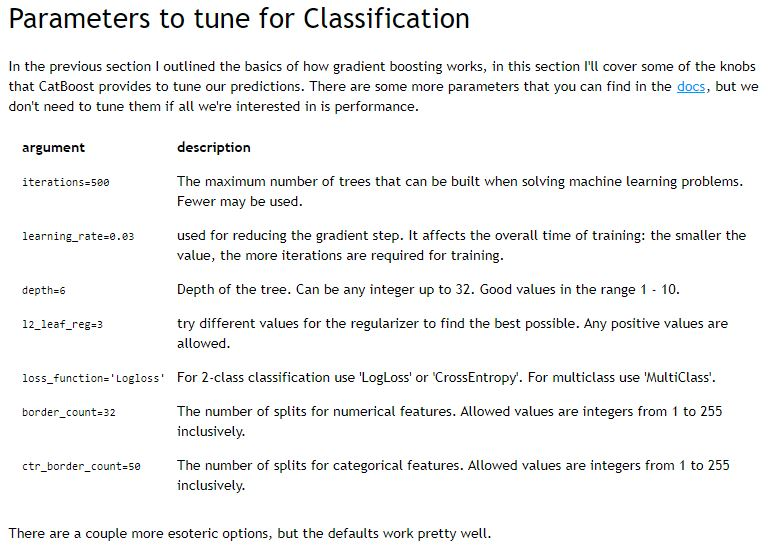

In [74]:
pbounds = {"n_estimators": (150,400),
           "depth": (2,7),
           "learning_rate": (.01, 0.2),
           "subsample":(0.6, 1.),
           "num_leaves": (16,40),
           "max_bin":(150,300),
           "l2_leaf_reg":(0,10),
           "model_size_reg": (0,10)
}

In [75]:
optimizer = BayesianOptimization(
    f = CB_opt,
    pbounds = pbounds,
    verbose = 2,
    random_state = 888,
)


In [76]:
optimizer.maximize(init_points = 2, n_iter = 20)

|   iter    |  target   |   depth   | l2_lea... | learni... |  max_bin  | model_... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.4794   |  6.298    |  1.646    |  0.1019   |  288.2    |  4.286    |  164.4    |  38.2     |  0.863    |
|  2        |  0.4347   |  2.665    |  5.334    |  0.1809   |  187.3    |  0.3017   |  168.1    |  36.98    |  0.8234   |
|  3        |  0.443    |  7.0      |  10.0     |  0.01     |  300.0    |  10.0     |  400.0    |  16.0     |  1.0      |
|  4        |  0.45     |  3.155    |  4.969    |  0.1342   |  295.9    |  0.3569   |  157.9    |  19.0     |  0.6378   |
|  5        |  0.481    |  4.401    |  5.411    |  0.1426   |  157.8    |  8.482    |  395.9    |  39.84    |  0.6667   |
|  6        |  0.4061   |  2.88     |  0.5134   |  0.0417   |  293.8    |  1.473    |  284.1    |  38.61    |  0.9234   |
|  7        |  0.4601   

In [78]:
print(optimizer.max)

{'target': 0.4872239064770249, 'params': {'depth': 6.610686189950905, 'l2_leaf_reg': 4.100100144113922, 'learning_rate': 0.164554181213692, 'max_bin': 150.0852122253629, 'model_size_reg': 8.509805841010435, 'n_estimators': 288.851250370525, 'num_leaves': 31.47454222348669, 'subsample': 0.877228613547345}}


In [ ]:
int(0.8601033552375243)

0

In [82]:
estimator = CatBoostClassifier(random_state=88,
                               depth = int(6.610686189950905),
                               l2_leaf_reg = int(4.100100144113922),
                               learning_rate =   0.164554181213692,
                               max_bin= int(150.0852122253629),
                               model_size_reg = int( 8.509805841010435),
                               n_estimators = int(288.851250370525),
                               num_leaves = int(31.47454222348669),
                               subsample = 1,
                               grow_policy = "Lossguide",
                               verbose=2)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)

In [83]:
estimator.fit(X_train,Y_train,cat_features=cat_cols)

0:	learn: 0.5182458	total: 50.1ms	remaining: 14.4s
2:	learn: 0.3373051	total: 141ms	remaining: 13.4s
4:	learn: 0.2817103	total: 224ms	remaining: 12.7s
6:	learn: 0.2459247	total: 306ms	remaining: 12.3s
8:	learn: 0.2327990	total: 415ms	remaining: 12.9s
10:	learn: 0.2074400	total: 514ms	remaining: 12.9s
12:	learn: 0.1954297	total: 602ms	remaining: 12.7s
14:	learn: 0.1911844	total: 692ms	remaining: 12.6s
16:	learn: 0.1841980	total: 793ms	remaining: 12.6s
18:	learn: 0.1804584	total: 885ms	remaining: 12.5s
20:	learn: 0.1774904	total: 980ms	remaining: 12.5s
22:	learn: 0.1758790	total: 1.07s	remaining: 12.3s
24:	learn: 0.1744264	total: 1.16s	remaining: 12.2s
26:	learn: 0.1734665	total: 1.25s	remaining: 12.1s
28:	learn: 0.1722958	total: 1.34s	remaining: 12s
30:	learn: 0.1714310	total: 1.45s	remaining: 12s
32:	learn: 0.1709936	total: 1.55s	remaining: 12s
34:	learn: 0.1703057	total: 1.64s	remaining: 11.9s
36:	learn: 0.1699379	total: 1.74s	remaining: 11.8s
38:	learn: 0.1696813	total: 1.84s	remaini

##Evaluate Model 

In [84]:
y_pred = estimator.predict(X_test)

###F1 score 

In [85]:
f1_score(Y_test,y_pred)

0.48954298993028666

##Confusion Matrix

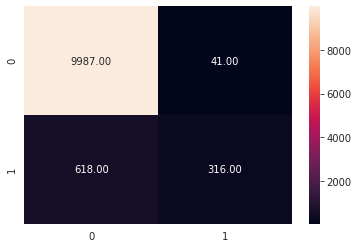

In [86]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt=".2f")

##New Catboost Parameters

In [98]:
cat = CatBoostClassifier(max_depth=3,
                                   random_state=88,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=6000,verbose=0)

In [99]:
cat.fit(X_train,Y_train,cat_features=cat_cols)

Did not improve scores

In [100]:
y_pred = cat.predict(X_test)
f1_score(Y_test,y_pred)

0.38095238095238093

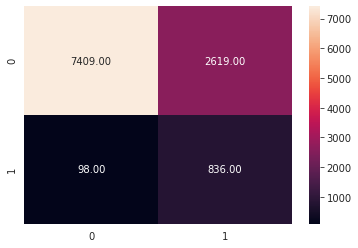

In [101]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt=".2f")

##Processing Test Data 

In [102]:
test.isnull().sum()[test.isnull().sum() > 0]

education               1034
previous_year_rating    1812
dtype: int64

## Impute Missing Values in Test Data

In [110]:
test['education'] = test['education'].fillna("Missing")
test['previous_year_rating'] = test['previous_year_rating'].fillna(0.0)

In [111]:
test_new = test[X.columns]

In [112]:
test_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,20,0.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,30,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,30,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,30,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,20,4.0,7,0,0,61


In [106]:
test_pred = estimator.predict(test_new)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


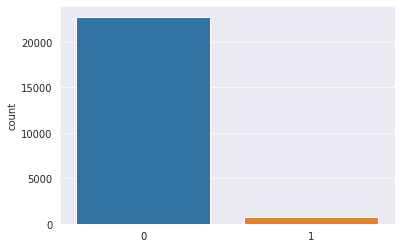

In [107]:
sns.countplot(test_pred)

In [108]:
sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [109]:
sub.shape

(23490, 2)

In [110]:
test.shape

(23490, 13)

In [111]:
sub["is_promoted"] = test_pred 
sub.to_csv("promotion_pred_catboost_2.csv",index=False)

* Submission scores : 0.45600756859035013 -catboost

* Your score for this submission is : 0.46772684752104765.- Catboost Age Bins

## LightGBM classifier

In [79]:
cat_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [88]:
X.department.value_counts(normalize=True,ascending=True)

R&D                  0.018227
Legal                0.018957
HR                   0.044118
Finance              0.046271
Analytics            0.097650
Procurement          0.130236
Technology           0.130236
Operations           0.207050
Sales & Marketing    0.307254
Name: department, dtype: float64

In [92]:
depart_mapper = {k:v for v,k in enumerate(X.department.value_counts(normalize=True,ascending=True).index.tolist())}
region_mapper = {k:v for v,k in enumerate(X.region.value_counts(normalize=True,ascending=True).index.tolist())}
education_mapper = {k:v for v,k in enumerate(X.education.value_counts(normalize=True,ascending=True).index.tolist())}
gender_mapper = {k:v for v,k in enumerate(X.gender.value_counts(normalize=True,ascending=True).index.tolist())}
recruitment_channel_mapper = {k:v for v,k in enumerate(X.recruitment_channel.value_counts(normalize=True,ascending=True).index.tolist())}

In [91]:
depart_mapper

{'Analytics': 4,
 'Finance': 3,
 'HR': 2,
 'Legal': 1,
 'Operations': 7,
 'Procurement': 5,
 'R&D': 0,
 'Sales & Marketing': 8,
 'Technology': 6}

In [93]:
recruitment_channel_mapper

{'other': 2, 'referred': 0, 'sourcing': 1}

In [99]:
X['department'] = X['department'].map(depart_mapper)
X['region'] = X['region'].map(region_mapper)
X['education'] = X['education'].map(education_mapper)
X['gender'] = X['gender'].map(gender_mapper)
X['recruitment_channel'] = X['recruitment_channel'].map(recruitment_channel_mapper)


In [100]:
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,31,2,0,1,1,30,5.0,8,1,0,49
1,7,32,3,1,2,1,20,5.0,4,0,0,60
2,8,18,3,1,1,1,30,3.0,7,0,0,50
3,8,21,3,1,2,2,30,1.0,10,0,0,50
4,6,28,3,1,2,1,40,3.0,2,0,0,73


In [74]:
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import * 
from sklearn.metrics import *

In [15]:
lgb_estimator = lgb.LGBMClassifier()

In [16]:
lgb_estimator

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## LightGBM: Cross-Validated Bayesian Hyperparameter Tuning 

In [75]:
def lgb_opt(n_estimators, depth, learning_rate, num_leaves, lambda_l1, lambda_l2,min_split_gain,min_child_weight): 
  scores = []
  skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1944)
  for train_index, test_index in skf.split(X, Y):
    
    trainx, valx = X.iloc[train_index], X.iloc[test_index]
    trainy, valy = Y.iloc[train_index], Y.iloc[test_index]
 
    reg = lgb.LGBMClassifier(verbose = 0,objective ='binary',
                        n_estimators = int(n_estimators),
                        learning_rate = learning_rate,
                        max_depth = int(depth),
                        num_leaves = int(num_leaves),
                        lambda_l1 = max(lambda_l1, 0),
                        lambda_l2 = max(lambda_l2, 0),
                        min_split_gain = min_split_gain,
                        min_child_weight = min_child_weight,
                        random_state = 88,                          
                            )
    
    reg.fit(trainx, trainy, eval_set = (valx, valy))
    scores.append(f1_score(valy, reg.predict(valx)))
  return np.mean(scores)

In [76]:
pbounds = {"n_estimators":(150,400),
           "learning_rate":(.01, 0.2),      
           "depth":(3,10),
           "num_leaves": (24, 45),
           "lambda_l1": (0, 5),
           "lambda_l2": (0, 3),
           "min_split_gain": (0.001, 0.1),
           "min_child_weight": (5, 50)
        }

In [77]:
optimizer = BayesianOptimization(
    f = lgb_opt,
    pbounds = pbounds,
    verbose = 2,
    random_state = 888,
)


In [101]:
optimizer.maximize(init_points = 2, n_iter = 20)

Streaming output truncated to the last 5000 lines.
[165]	valid_0's binary_logloss: 0.161788
[166]	valid_0's binary_logloss: 0.161827
[167]	valid_0's binary_logloss: 0.161872
[168]	valid_0's binary_logloss: 0.161907
[169]	valid_0's binary_logloss: 0.161914
[170]	valid_0's binary_logloss: 0.161907
[171]	valid_0's binary_logloss: 0.161952
[172]	valid_0's binary_logloss: 0.161999
[173]	valid_0's binary_logloss: 0.161984
[174]	valid_0's binary_logloss: 0.161975
[175]	valid_0's binary_logloss: 0.161977
[176]	valid_0's binary_logloss: 0.161985
[177]	valid_0's binary_logloss: 0.16202
[178]	valid_0's binary_logloss: 0.161973
[179]	valid_0's binary_logloss: 0.161985
[180]	valid_0's binary_logloss: 0.161956
[181]	valid_0's binary_logloss: 0.161962
[182]	valid_0's binary_logloss: 0.161926
[183]	valid_0's binary_logloss: 0.161946
[184]	valid_0's binary_logloss: 0.161938
[185]	valid_0's binary_logloss: 0.161923
[186]	valid_0's binary_logloss: 0.161906
[187]	valid_0's binary_logloss: 0.161932
[188]	v

In [102]:
print(optimizer.max)

{'target': 0.508196607327596, 'params': {'depth': 8.433388850125557, 'lambda_l1': 0.0649951781671293, 'lambda_l2': 2.0947398452036254, 'learning_rate': 0.13316348163687383, 'min_child_weight': 5.829368930022417, 'min_split_gain': 0.007309855274415797, 'n_estimators': 262.16967515738065, 'num_leaves': 43.8648514072322}}


In [103]:
lgbm = lgb.LGBMClassifier(verbose = 0,objective ='binary',
                        n_estimators = int(262.16967515738065),
                        learning_rate = 0.13316348163687383,
                        max_depth = int(8.433388850125557),
                        num_leaves = int(43.8648514072322),
                        lambda_l1 = max(0.0649951781671293, 0),
                        lambda_l2 = max(2.0947398452036254, 0),
                        min_split_gain = 0.007309855274415797,
                        min_child_weight = 5.829368930022417,
                        random_state = 88,                          
                            )

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)

In [105]:
lgbm.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lambda_l1=0.0649951781671293,
               lambda_l2=2.0947398452036254, learning_rate=0.13316348163687383,
               max_depth=8, min_child_samples=20,
               min_child_weight=5.829368930022417,
               min_split_gain=0.007309855274415797, n_estimators=262, n_jobs=-1,
               num_leaves=43, objective='binary', random_state=88,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=0)

In [106]:
y_pred = lgbm.predict(X_test)

In [107]:
f1_score(Y_test,y_pred)

0.5154950869236583

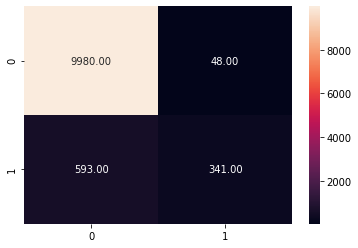

In [108]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt=".2f")

## Prepare test_data

In [113]:
test_new['department'] = test_new['department'].map(depart_mapper)
test_new['region'] = test_new['region'].map(region_mapper)
test_new['education'] = test_new['education'].map(education_mapper)
test_new['gender'] = test_new['gender'].map(gender_mapper)
test_new['recruitment_channel'] = test_new['recruitment_channel'].map(recruitment_channel_mapper)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [114]:
test_new.isnull().sum()[test_new.isnull().sum() > 0]

Series([], dtype: int64)

In [115]:
test_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,6,28,3,1,1,1,20,0.0,1,1,0,77
1,2,26,3,0,2,1,30,3.0,5,0,0,51
2,8,29,3,1,2,1,30,1.0,4,0,0,47
3,5,33,3,0,2,3,30,2.0,9,0,0,65
4,3,20,3,1,1,1,20,4.0,7,0,0,61


In [118]:
test_pred = lgbm.predict(test_new)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


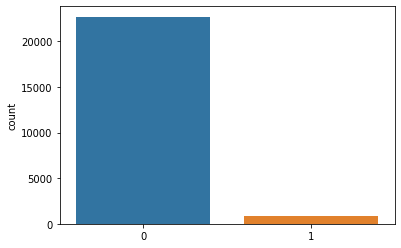

In [119]:
sns.countplot(test_pred)

In [120]:
sub["is_promoted"] = test_pred 
sub.to_csv("promotion_pred_lightgbm.csv",index=False)

**Your score for this submission is : 0.5031000885739593.- LightGBM**